In [1]:
 pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.2 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=8e8f0ec7d1e35f6fd8bee8b03ede274804ed449b3d0a61fe956030652af17117
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

'''
Variables:
---------

corpus : list of documents
embeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension)
red_emd : reduced embeddings matrix using dimentionality reduction
k : number of clusters
labels : documents labels
pred : list of clustering predicted clusters

''';

In [3]:
def dim_red(mat, p):
    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM list
        p : number of dimensions to keep
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''

    # Apply PCA for dimensionality reduction
    tsne = TSNE(n_components=p)
    red_mat = tsne.fit_transform(mat)
    red_mat = mat[:,:p]

    return red_mat

In [4]:
def clust(mat, k):
    '''
    Perform clustering

    Input:
    -----
        mat : input list
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(mat)
    pred = kmeans.labels_

    return pred
    #pred = np.random.randint(k, size=len(corpus))

    #return pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


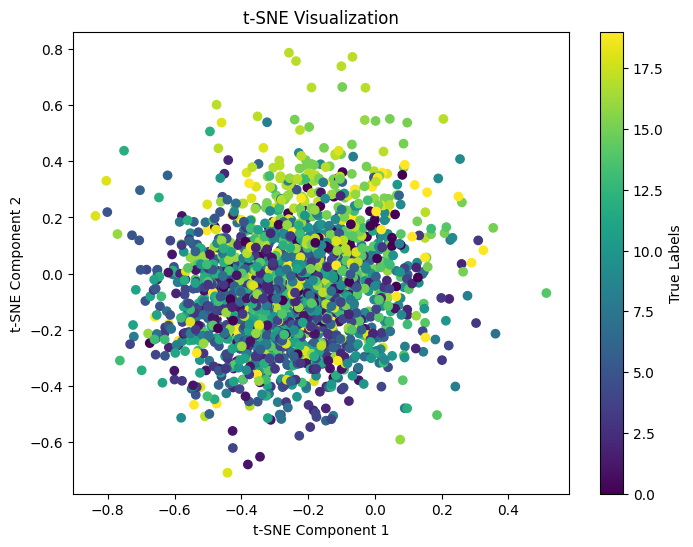

NMI: 0.09 
ARI: 0.02


In [6]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

# perform dimentionality reduction
red_emb = dim_red(embeddings, 2)
# perform clustering
pred = clust(red_emb, k)

# Visualization using t-SNE reduced embeddings
plt.figure(figsize=(8, 6))
plt.scatter(red_emb[:, 0], red_emb[:, 1], c=labels, cmap='viridis')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='True Labels')
plt.show()

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')
